#### Exercise 2.5 (Page 56)

In [1]:
import numpy as np
def m(n):
    return n + 1

def delta(N, epsilon):
    return 4 * m(2 * N) / (np.exp(N * (epsilon ** 2) / 8))

print(delta(100, 0.1))

709.5275096780147


#### Problem 2.1 (Page 69) 

In [2]:
import numpy as np

delta = 0.03
def f(M, epsilon):
    return np.log(2 * M / delta)/(2 * epsilon ** 2)

#(a)
print(f(1, 0.05))

839.9410155759853


In [3]:
#(b)
print(f(100, 0.05))

1760.9750527736032


In [4]:
#(c)
print(f(10000, 0.05))

2682.0090899712213


#### Problem 2.3 (Page 69) 

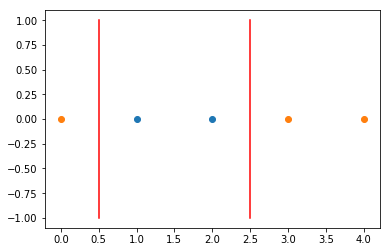

In [6]:
#(b)
import matplotlib.pyplot as plt

plt.scatter([1, 2], [0, 0])
plt.scatter([0, 3, 4], [0, 0, 0])
plt.plot([0.5, 0.5], [-1, 1], color='red')
plt.plot([2.5, 2.5], [-1, 1], color='red')
plt.show()

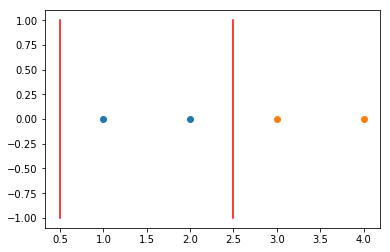

In [7]:
plt.scatter([1, 2], [0, 0])
plt.scatter([3, 4], [0, 0])
plt.plot([0.5, 0.5], [-1, 1], color='red')
plt.plot([2.5, 2.5], [-1, 1], color='red')
plt.show()

#### Problem 2.7 (Page 70)

In [9]:
import matplotlib.pyplot as plt
import numpy as np 

def f1(N, d):
    return (N ** d) + 1

def f2(N, d):
    return (np.exp(1) * N / d) ** d

def draw(d):
    n = range(1,50)
    m1 = [f1(i, d) for i in n]
    m2 = [f2(i, d) for i in n]
    
    plt.plot(n, m1, label='f1')
    plt.plot(n, m2, label='f2')
    plt.legend()
    plt.title('dvc='+str(d))
    plt.show()

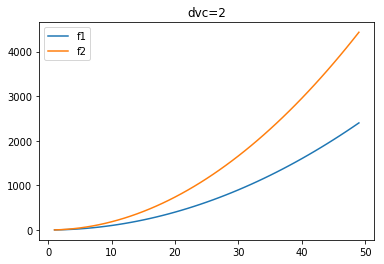

In [10]:
#d=2
draw(2)

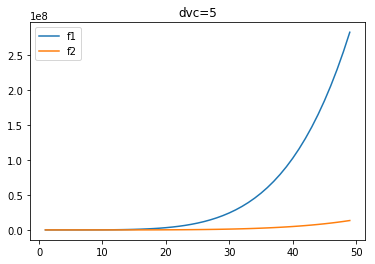

In [11]:
#d=3
draw(5)

#### Problem 2.9 (Page 70)

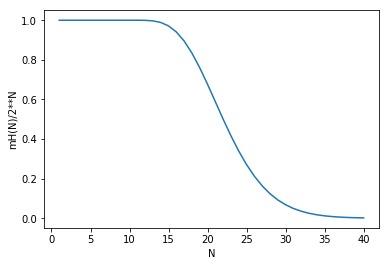

In [12]:
from scipy.special import comb
import matplotlib.pyplot as plt

def m(N, d):
    result = 0
    k = min(d, N-1)
    for i in range(k + 1):
        result += comb(N-1, i)
    return 2 * result

x = range(1,41)
d = 10
y = [m(i, d) / (2 ** i) for i in x]

plt.plot(x,y)
plt.xlabel('N')
plt.ylabel('mH(N)/2**N')
plt.show()

In [13]:
print([m(i, d) / (2 ** i) for i in [10, 20, 40]])

[1.0, 0.6761970520019531, 0.0016889239559532143]


#### Problem 2.11 (Page 70)

In [14]:
import numpy as np

delta = 0.1

def f(N, delta):
    return np.sqrt(8 / N * np.log(4 * (2 * N + 1) /delta))

In [15]:
print(f(100, delta))

0.8481596247015304


In [16]:
print(f(10000, delta))

0.10427815497178729


#### Problem 2.12 (Page 71)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

delta = 0.05
dvc = 10

def f(N):
    return (8 / N * np.log(4 * ((2 * N) ** dvc + 1) / delta)) ** 0.5 - 0.05

n = 1
while(True):
    if(f(n) <= 0):
        break
    else:
        n += 1

print(n)

452957


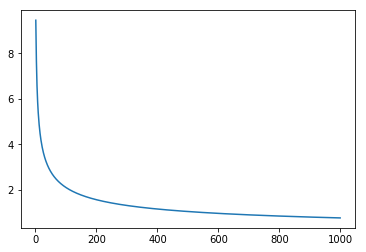

In [18]:
#作图
x = range(1, 1000)
y = [f(i) for i in x]

plt.plot(x, y)
plt.show()

#### Problem 2.15 (Page 71)

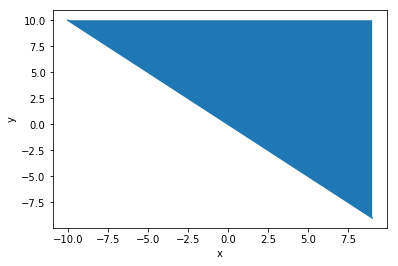

In [19]:
import matplotlib.pyplot as plt

x = range(-10, 10)
y = [-i for i in x]
up = [10] * len(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)

plt.fill_between(x, y, up)
plt.show()

#### Problem 2.20 (Page 73)

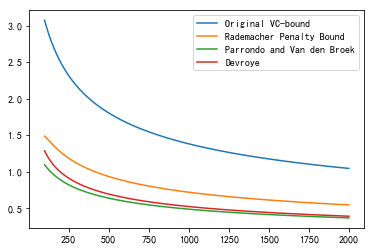

In [20]:
from scipy.special import comb
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

dvc = 50
delta = 0.05

#计算m(N)
def m(n):
    k = min(dvc, n)
    s = 0
    for i in range(k+1):
        s += comb(n, k)
    return s

#Original VC-bound
def f1(n):
    result = (8 / n) * np.log(4 * m(2 * n) / delta)
    result = result ** 0.5
    return result

#Rademacher Penalty Bound
def f2(n):
    k1 = (2 * np.log(2 * n * m(n)) / n)
    k2 = (2 / n) * np.log(1 / delta)
    k3 = 1 / n
    result = k1 ** 0.5 + k2 ** 0.5 + k3
    return result

#Parrondo and Van den Broek
def f3(n):
    k1 = 1 / n
    k2 = 1 / (n ** 2) + (1 / n) * np.log(6 * m(2 * n) / delta)
    k2 = k2 ** 0.5
    result = k1 + k2
    return result

#Devroye
def f4(n):
    k1 = 1 / (n - 2)
    k2 = np.log(4 * m(n ** 2) / delta) / (2 * (n - 2)) + 1 / ((n - 2) ** 2)
    k2 = k2 ** 0.5
    result = k1 + k2
    return result

#产生点集
x = np.arange(100, 2000)

y1 = [f1(i) for i in x]
y2 = [f2(i) for i in x]
y3 = [f3(i) for i in x]
y4 = [f4(i) for i in x]

plt.plot(x, y1, label="Original VC-bound")
plt.plot(x, y2, label="Rademacher Penalty Bound")
plt.plot(x, y3, label="Parrondo and Van den Broek")
plt.plot(x, y4, label="Devroye")
plt.legend()
plt.show()

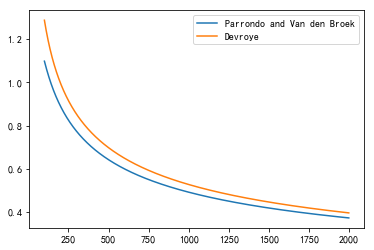

In [21]:
#比较y3, y4
plt.plot(x, y3, label="Parrondo and Van den Broek")
plt.plot(x, y4, label="Devroye")
plt.legend()
plt.show()

#### Problem 2.23 (Page 74)

(a)

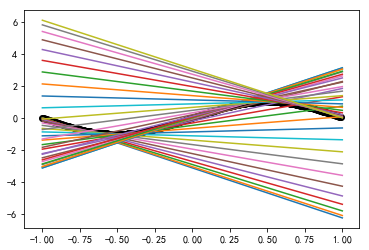

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def f(x):
    return math.sin(math.pi * x)


#### Part 1: y=kx+b
#已知(x1,y1),(x2,y2)过直线y=kx+b，此函数返回k,b
def treat(x1,x2):
    y1 = f(x1)
    y2 = f(x2)
    k = (y2 - y1) / (x2 - x1)
    b = (y1 * x2 - y2 * x1) / (x2 - x1)
    return k, b

#以0.05为间隔产生-1到1的点集，对每个点，求每个点与其后面一个点连线的直线
x = np.arange(-1, 1, 0.05)

#求出对应的k,b
u = []
for i in range(x.size-1):
    u.append(treat(x[i], x[i+1]))

#求出直线
X1 = np.array([-1.0, 1.0])
Y1 = []
for i in u:
    temp = X1 * i[0] + i[1]
    Y1.append(temp)

#y=sin(pix)
X2 = np.arange(-1,1,0.01)
Y2 = np.sin(np.pi * X2)

for i in Y1:
    plt.plot(X1, i)
plt.scatter(X2, Y2, c='BLACK')
plt.show()

In [5]:
#定义误差函数
def s1(x, x1, x2):
    #此处用numpy计算会产生错误，暂时没找到原因
    y1 = f(x1)
    y2 = f(x2)
    #为了防止分母为0
    try:
        k = (y2 - y1) / (x2 - x1)
        b = (y1 * x2 - y2 * x1) / (x2 - x1)
    except:
        k = (y2 - y1) / (x2 - x1 + 10 ** (-10))
        b = (y1 * x2 - y2 * x1) / (x2 - x1 + 10 ** (-10))
    y = f(x)
    y0 = k * x + b
    return 1 / 8 * (y - y0) ** 2

print(integrate.tplquad(s1, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(1.8829992352626945, 1.409809326862331e-10)


In [6]:
#计算bias
#模拟求出系数
def simulation(n):
    k = 0
    b = 0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1 = np.random.uniform(-1, 1)
        x2 = np.random.uniform(-1, 1)
        k1, b1 = treat(x1, x2)
        k += k1
        b += b1
    return k / n, b / n

#比较下10000次以上的结果
n = range(10 ** 4, 10 ** 5+1, 10 ** 4)
result =[]
for i in n:
    temp = simulation(i)
    print(temp)
    result.append(temp)

(0.8173573934459272, 0.0022386565162670264)
(0.7705758041200941, -0.003887001119915329)
(0.7950519919327702, -0.0021063482625740025)
(0.7612172282002277, -0.00028998733978659075)
(0.7650953046679252, -0.0017554686463119747)
(0.7725968978737041, 0.005467835334268712)
(0.7843637013505946, 0.00298602328006142)
(0.7731765274931705, 0.0024678381868252983)
(0.7730108488326077, -0.0031621909152766687)
(0.7683958880167916, -0.0027188153497075883)


In [7]:
#取第一组计算bias
a1, b1 = result[0]

def bias(x):
    y1 = a1 * x + b1
    y2 = f(x)
    return (y1 - y2) ** 2 / 2

print(integrate.quad(bias,-1,1))

(0.2023501700313988, 5.600953351794085e-10)


In [8]:
#计算var
def var(x, x1, x2):
    y1 = f(x1)
    y2 = f(x2)
    try:
        k = (y2 - y1) / (x2 - x1)
        b = (y1 * x2 - y2 * x1) / (x2 - x1)
    except:
        k = (y2 - y1) / (x2 - x1 + 10 ** (-10))
        b = (y1 * x2 - y2 * x1) / (x2 - x1 + 10 ** (-10))
    #之前计算的平均系数
    yavg= a1 * x + b1
    #真实值
    yrea = k * x + b
    return 1 / 8 * (yavg - yrea) ** 2

print(integrate.tplquad(var, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(1.6768595057474496, 2.311856544782576e-12)


(b)

In [9]:
#### Part 2: y=kx
#定义误差函数
def s1_b(x, x1, x2):
    y1 = f(x1)
    y2 = f(x2)
    #为了防止分母为0
    try:
        a = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2)
    except:
        a = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2 + 10 ** (-6))
    y = f(x)
    y0 = a*x
    return 1 / 8 * (y - y0) ** 2

print(integrate.tplquad(s1_b, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(0.507219461635839, 1.3595152276862434e-08)


In [10]:
#bias
#模拟求出系数
def simulation_b(n):
    a = 0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1 = np.random.uniform(-1, 1)
        x2 = np.random.uniform(-1, 1)
        y1 = f(x1)
        y2 = f(x2)
        a1 = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2)
        a += a1
    return a / n

#比较下10000次以上的结果
n = range(10 ** 4, 10 ** 5+1, 10 ** 4)
result =[]
for i in n:
    temp = simulation_b(i)
    print(temp)
    result.append(temp)

1.4276259488473502
1.4321939362343843
1.4345987155625277
1.430510626045963
1.4271902305037465
1.4329941201258598
1.4261520694393208
1.4243499092826157
1.4257831550130027
1.4321469294493572


In [11]:
#取第一组计算bias
a1 = result[0]
#bias
def bias_b(x):
    y1 = a1 * x
    y2 = f(x)
    return (y1 - y2) ** 2 / 2

print(integrate.quad(bias_b, -1, 1))

(0.27051704335951327, 3.806731128263678e-10)


In [12]:
#var
def var_b(x, x1, x2):
    y1 = f(x1)
    y2 = f(x2)
    try:
        a = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2)
    except:
        a = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2 + 10 ** (-6))
    yavg = a1 * x
    yrea = a * x
    return 1 / 8 * (yavg - yrea) ** 2

print(integrate.tplquad(var_b, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(0.23657597958139748, 1.4870389231707782e-08)


(c)

In [13]:
#### Part 3: y=b
#定义误差函数
def s1_c(x, x1, x2):
    y1 = f(x1)
    y2 = f(x2)
    b = (y1 + y2) / 2
    y = f(x)
    y1 = b
    return 1 / 8 * (y - y1) ** 2
print(integrate.tplquad(s1_c, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(0.75, 9.174802559227526e-11)


In [14]:
#bias
#模拟求出系数
def simulation_c(n):
    b = 0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1 = np.random.uniform(-1, 1)
        x2 = np.random.uniform(-1, 1)
        y1 = f(x1)
        y2 = f(x2)
        b1 = (y1 + y2) / 2
        b += b1
    return(b / n)

#比较下10000次以上的结果
n = range(10 ** 4, 10 ** 5+1, 10 ** 4)
result =[]
for i in n:
    temp = simulation_c(i)
    print(temp)
    result.append(temp)

0.0032387132308861425
0.0007637750639711535
0.001709963763838227
0.0007318085005171177
0.0019178728746197919
0.0021059556687830203
-0.002393825715562925
-0.0010197448325790135
-0.002155286740170465
-0.0002856497992725231


In [15]:
#取第一组计算bias
b1 = result[0]
def bias_c(x):
    y1 = b1
    y2 = f(x)
    return (y1 - y2) ** 2 / 2

print(integrate.quad(bias_c, -1, 1))

(0.500010489263392, 3.669920676267717e-10)


In [16]:
#var
def var_c(x, x1, x2):
    y1 = f(x1)
    y2 = f(x2)
    b = (y1 + y2)/2
    yavg = b1
    yrea = b 
    return 1 / 8 * (yavg - yrea) ** 2

print(integrate.tplquad(var_c, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(0.25001048926339187, 8.887204421411819e-11)


#### Problem 2.24 (Page 75)

In [37]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 19 17:23:17 2019

@author: qinzhen
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def f(x):
    return x ** 2

#模拟求出系数
def simulation(n):
    a = 0
    b = 0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1 = np.random.uniform(-1, 1)
        x2 = np.random.uniform(-1, 1)
        a1 = (x1 + x2)
        b1 = - x1 * x2
        a += a1
        b += b1
    return a / n, b / n

#比较下10000次以上的结果
n = range(10 ** 4, 10 ** 5+1, 10 ** 4)
result =[]
for i in n:
    temp = simulation(i)
    print(temp)
    result.append(temp)

(-0.007259431812949206, -0.006505637449944645)
(0.01054551337977565, 0.0007205658774392578)
(0.002200261748429362, 0.00039501424061546197)
(-0.0036746772681782273, 3.6611066267928454e-05)
(0.0005707483200652478, 0.0012540525909730687)
(-0.0035353924654228748, -0.0027067893024173384)
(0.002037735570941735, 0.0008453013796700488)
(0.0003824037342788735, -0.0006510451808963282)
(-0.002044260427503321, 0.0010197292343565425)
(-0.002699490891714745, 0.0017938900684602123)


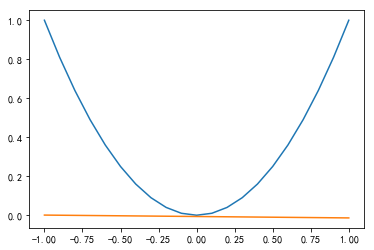

In [38]:
#选择第一组数据并作图
a, b = result[0]
x1 = np.arange(-1, 1.1, 0.1)
y1 = [f(i) for i in x1]
x2 = np.array([-1, 1])
y2 = a * x2 + b

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

In [39]:
#计算积分
#定义误差函数
def s1(x, x1, x2):
    a = (x1 + x2)
    b = - x1 * x2
    y = f(x)
    y1 = a * x + b
    return 1 / 8 * (y - y1) ** 2

print(integrate.tplquad(s1, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(0.5333333333333333, 8.785771717918444e-15)


In [40]:
#bias
def bias(x):
    y1 = a * x + b
    y2 = f(x)
    return (y1 - y2) ** 2 / 2

print(integrate.quad(bias, -1, 1))

(0.2043969814020088, 2.2692623491639006e-15)


In [41]:
#var
def var(x, x1, x2):
    yavg = a * x + b
    a1 = (x1 + x2)
    b1 = -x1 * x2
    yrea = a1 * x + b1
    return 1 / 8 * (yavg - yrea) ** 2

print(integrate.tplquad(var, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1))

(0.3333932231020458, 6.3874396220908005e-15)
